# Food Delivery Orders EDA
**Author:** Jessy Andújar Cruz

**Date:** 2025-05-27

## Introduction

### Project Description
This project aims to perform an exploratory data analysis (EDA) on a food delivery orders dataset. By investigating trends and patterns in customer orders, cuisine preferences, order costs, and delivery performance, the goal is to uncover actionable insights that could help food delivery platforms and restaurants improve their service and operations.

### Objective
The primary objectives of this analysis are:
- To clean and prepare the dataset for analysis by addressing missing values, data types, and outliers.
- To perform descriptive and visual analyses on order characteristics such as cuisine type, cost, preparation, and delivery times.
- To engineer new features that allow for deeper insights, such as identifying late deliveries and evaluating the relationship between food preparation and delivery times.
- To segment orders by cost and satisfaction, helping identify top-selling cuisines, high-value customers, and potential areas for operational improvement.

### Dataset Information
The dataset, obtained from [Kaggle: Food Ordering and Delivery App Dataset](https://www.kaggle.com/datasets/ahsan81/food-ordering-and-delivery-app-dataset), contains 1,898 records of food delivery orders. Each record includes details such as:
- Order and customer IDs
- Restaurant name and cuisine type
- Cost of the order
- Day of the week for the order
- Customer rating
- Food preparation and delivery times

This analysis will provide a foundation for further data-driven strategies in the food delivery sector.

#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

#### Import dataset

In [79]:
df = pd.read_csv('../data/raw/food_order.csv')

#### Data overview

In [80]:
df.sample(10) # display a random sample of 10 rows from the dataset

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
999,1477388,396432,Blue Ribbon Sushi Izakaya,Japanese,9.70,Weekend,Not given,25,15
1069,1477984,353676,indikitch,Indian,14.07,Weekend,4,20,30
208,1477150,92832,Five Guys Burgers and Fries,American,12.23,Weekend,5,22,22
185,1477774,354719,The Meatball Shop,Italian,29.15,Weekend,5,34,20
1264,1477585,350410,Burger Joint,American,11.98,Weekend,Not given,20,17
1592,1476781,333449,Shake Shack,American,12.13,Weekday,Not given,22,25
1694,1477606,39406,RedFarm Broadway,Chinese,9.27,Weekday,4,32,29
1511,1477386,221394,The Meatball Shop,Italian,8.83,Weekday,Not given,31,25
60,1476896,388918,Blue Ribbon Fried Chicken,American,24.25,Weekend,Not given,28,21
1017,1477332,43018,RedFarm Hudson,Chinese,24.20,Weekend,5,27,19


In [81]:
df.info() # check data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [82]:
df.describe() # get summary statistics for numerical columns

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


## Data Cleaning

##### Check for duplicates: (e.g., duplicated order_id)


In [83]:
order_is_duplicate = df['order_id'].duplicated().sum() # check for duplicate order IDs
print(f"Number of duplicate order IDs: {order_is_duplicate}")

customer_is_duplicate = df['customer_id'].duplicated().sum() # check for duplicate customer IDs
print(f"Number of duplicate customer IDs: {customer_is_duplicate}")

Number of duplicate order IDs: 0
Number of duplicate customer IDs: 698


##### Standardize categorical values: e.g., ensure day_of_the_week has only “Weekend”/“Weekday” (no typos or variations).

In [84]:
print('Orders by day of the week:')
df['day_of_the_week'].value_counts(dropna=False) # count the number of orders for each day of the week


Orders by day of the week:


day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

##### Ensure all costs are positive.

In [85]:
print('Count of pos vs neg values:')
pos = (df['cost_of_the_order'] >= 0).sum()
neg = (df['cost_of_the_order'] < 0).sum()
print(f"Non-negative values: {pos}")
print(f"Negative values: {neg}")

Count of pos vs neg values:
Non-negative values: 1898
Negative values: 0


##### Make sure food prep and delivery times are non-negative.

In [86]:
print('Food preparation time values are non-negative:')
food_prep_pos = df['food_preparation_time'] >= 0
food_prep_neg = df['food_preparation_time'] < 0
print('Non-negative values:', food_prep_pos.sum())
print('Negative values:', food_prep_neg.sum())

print('\nDelivery Time values are non-negative:')
delivery_time_pos = df['delivery_time'] >= 0
delivery_time_neg = df['delivery_time'] < 0
print(f'Non-negative values: {delivery_time_pos.sum()}')
print(f'Negative values: {delivery_time_neg.sum()}')

Food preparation time values are non-negative:
Non-negative values: 1898
Negative values: 0

Delivery Time values are non-negative:
Non-negative values: 1898
Negative values: 0


#####  Change rating column to type int16 and use NaN for 'not given' rating.

In [87]:
df['rating'] = df['rating'].replace('Not given', np.nan)  # Replace 'Not given' with NaN
df['rating'] = df['rating'].astype('float').astype('Int16')  # Convert rating to nullable integer type
print('Rating values after conversion:')
df['rating'].value_counts(dropna=False) # Display counts of ratings including NaN values

Rating values after conversion:


rating
<NA>    736
5       588
4       386
3       188
Name: count, dtype: Int64

## Feature Engineering

##### Add an order_total_time column

In [88]:
df['order_total_time'] = df['food_preparation_time'] + df['delivery_time']
df[['order_id', 'order_total_time']].sample(10)  # Display a random sample of 10 rows from the new column


,order_id,order_total_time
939,1477907,57
535,1476904,40
1618,1478038,59
1852,1476644,63
165,1476751,51
890,1477093,66
171,1476688,36
1667,1476883,38
1443,1478300,47
871,1477046,54


##### Add a food_preparation_time_mean column to help the restaurant improve food preparation times

In [89]:
if 'food_preparation_time_mean' not in df.columns:
    food_preparation_time_mean = df.groupby('restaurant_name')['food_preparation_time'].transform('mean')
    df.insert(value=food_preparation_time_mean, column='food_preparation_time_mean', loc=df.columns.get_loc('food_preparation_time') + 1)  # Insert the new column at index 2
    df['food_preparation_time_mean'] = df['food_preparation_time_mean'].round(2)  # Fill NaN values with 0
df[['restaurant_name', 'food_preparation_time', 'food_preparation_time_mean']].sample(10)  # Display a random sample of 10 rows with the new column

,restaurant_name,food_preparation_time,food_preparation_time_mean
1038,Sushi of Gari 46,27,27.54
1108,Blue Ribbon Sushi,24,27.92
727,The Meatball Shop,33,27.18
594,Blue Ribbon Sushi Izakaya,21,28.72
143,Sushi of Gari,32,28.19
1804,Rubirosa,23,28.24
1814,Blue Ribbon Fried Chicken,30,27.20
84,The Meatball Shop,34,27.18
1178,Tres Carnes,25,27.00
1260,Momoya,21,27.30


In [90]:
df[df['restaurant_name'] == 'Sushi of Gari 46'][['restaurant_name', 'food_preparation_time', 'food_preparation_time_mean']].head() # Display rows for a specific restaurant to check the food preparation time against the mean

,restaurant_name,food_preparation_time,food_preparation_time_mean
29,Sushi of Gari 46,20,27.54
56,Sushi of Gari 46,24,27.54
159,Sushi of Gari 46,31,27.54
226,Sushi of Gari 46,35,27.54
237,Sushi of Gari 46,24,27.54


##### Based on the new added column 'food_preparation_time_mean' create a column to check if food is late.

In [91]:
if 'prep_time_status' not in df.columns:
    prep_time_status = df.apply(
        lambda row: 'Very late' if row['food_preparation_time'] > row['food_preparation_time_mean'] * 1.25
        else 'Late' if row['food_preparation_time'] > row['food_preparation_time_mean']
        else 'On time',
        axis=1
    )
    df.insert(value=prep_time_status, column='prep_time_status', loc=df.columns.get_loc('food_preparation_time_mean') + 1) # Insert the new column after 'food_preparation_time_mean'
df[['restaurant_name', 'food_preparation_time', 'food_preparation_time_mean', 'prep_time_status']].sample(10)  # Display a random sample of 10 rows with the new column

,restaurant_name,food_preparation_time,food_preparation_time_mean,prep_time_status
147,Shake Shack,25,27.95,On time
212,Han Dynasty,21,27.41,On time
1405,Shake Shack,26,27.95,On time
1548,Blue Ribbon Fried Chicken,28,27.20,Late
380,Blue Ribbon Fried Chicken,31,27.20,Late
427,J. G. Melon,23,28.47,On time
413,S'MAC,30,29.42,Late
209,Shake Shack,25,27.95,On time
847,Blue Ribbon Sushi,33,27.92,Late
1682,Shake Shack,26,27.95,On time


##### Add an order_total_time_mean column

In [92]:
if 'order_total_time_mean' not in df.columns:
    order_total_time_mean = df.groupby('restaurant_name')['order_total_time'].transform('mean') # Calculate the mean order total time for each restaurant
    df.insert(value=order_total_time_mean, column='order_total_time_mean', loc=df.columns.get_loc('order_total_time') + 1)  # Insert the new column after 'order_total_time'
    df['order_total_time_mean'] = df['order_total_time_mean'].round(2)  # Round the mean order total time to 2 decimal places
df[['restaurant_name', 'order_total_time', 'order_total_time_mean']].sample(10)  # Display a random sample of 10 rows with the new column


,restaurant_name,order_total_time,order_total_time_mean
118,Yama Japanese Restaurant,60,51.00
1494,Sushi of Gari 46,47,53.51
1761,Westville Hudson,48,47.40
780,The Meatball Shop,47,51.42
1464,Chipotle Mexican Grill $1.99 Delivery,47,49.87
534,Vanessa's Dumpling House,43,49.78
1737,Le Zie 2000 Trattoria,52,52.00
1746,5 Napkin Burger,55,54.60
179,Amy Ruth's,56,58.00
994,Yama Japanese Restaurant,51,51.00


In [93]:
df[df['restaurant_name'] == 'Sushi of Gari 46'][['restaurant_name', 'order_total_time', 'order_total_time_mean']].head() # Display rows for a specific restaurant to check the total order time against the mean

,restaurant_name,order_total_time,order_total_time_mean
29,Sushi of Gari 46,49,53.51
56,Sushi of Gari 46,48,53.51
159,Sushi of Gari 46,64,53.51
226,Sushi of Gari 46,58,53.51
237,Sushi of Gari 46,44,53.51


##### Based on column 'order_total_time' create a column to check if order is late

In [94]:
if 'order_time_status' not in df.columns:
    # Create a new column to categorize order total time based on the mean
    order_time_status = df.apply(
        lambda row: 'Very late' if row['order_total_time'] > row['order_total_time_mean'] * 1.25
        else 'Late' if row['order_total_time'] > row['order_total_time_mean']
        else 'On time',
        axis=1
    )
    df.insert(value=order_time_status, column='order_time_status', loc=df.columns.get_loc('order_total_time_mean') + 1) # Insert the new column after 'order_total_time_mean'
df[['restaurant_name', 'order_total_time', 'order_total_time_mean', 'order_time_status']].sample(10)  # Display a random sample of 10 rows with the new column

,restaurant_name,order_total_time,order_total_time_mean,order_time_status
493,RedFarm Hudson,47,51.36,On time
70,Shake Shack,43,52.61,On time
666,Chipotle Mexican Grill $1.99 Delivery,52,49.87,Late
1144,RedFarm Broadway,49,50.75,On time
1016,Blue Ribbon Sushi,64,51.87,Late
1749,The Meatball Shop,55,51.42,Late
1431,RedFarm Broadway,58,50.75,Late
298,Bubby's,62,56.33,Late
783,Parm,58,52.81,Late
975,Shake Shack,56,52.61,Late


##### Create a column if the delivery was good or not based on the client rating (4-5 is good)

In [95]:
df['order_is_good'] = df['rating'].apply(lambda x: True if x >= 4 else False if pd.notna(x) else np.nan)  # Create a new column based on the rating
df[['restaurant_name', 'rating', 'order_is_good']].sample(10)  # Display a random sample of 10 rows with the new column

,restaurant_name,rating,order_is_good
1236,Parm,4,True
1298,Nobu Next Door,<NA>,NaN
1792,Grand Sichuan International,5,True
166,RedFarm Broadway,4,True
553,Blue Ribbon Sushi,<NA>,NaN
2,Cafe Habana,5,True
328,The Meatball Shop,3,False
1229,RedFarm Hudson,5,True
1355,Sushi of Gari 46,5,True
1699,Blue Ribbon Fried Chicken,5,True


##### Based on the Q1 and Q3 percentile by cuisine type add a column if the cost_of_the_order is expensive, normal or cheap

In [96]:
# Calculate Q1, Q3, and IQR for each cuisine type
Q1 = df.groupby('cuisine_type')['cost_of_the_order'].quantile(0.25)
Q3 = df.groupby('cuisine_type')['cost_of_the_order'].quantile(0.75)
IQR = Q3 - Q1

# Merge quantiles and IQR back to the original dataframe
df['Q1'] = df['cuisine_type'].map(Q1)
df['Q3'] = df['cuisine_type'].map(Q3)
df['IQR'] = df['cuisine_type'].map(IQR)

# Calculate the lower and upper bounds for outliers based on IQR
df['outliers_lower_bound'] = df['Q1'] - 1.5 * df['IQR']
df['outliers_upper_bound'] = df['Q3'] + 1.5 * df['IQR']

# Categorize the cost_of_the_order based on Q1 and Q3 values
df['cost_category'] = df.apply(lambda row: 'Expensive' if row['cost_of_the_order'] > row['outliers_upper_bound'] else 'Normal' if row['cost_of_the_order'] > row['outliers_lower_bound'] else 'Cheap', axis=1)

# Drop the Q1, Q3, and IQR columns as they are no longer needed
df = df.drop(columns=['Q1', 'Q3', 'IQR', 'outliers_lower_bound', 'outliers_upper_bound'])

# View the result
df[['cuisine_type', 'cost_of_the_order', 'cost_category']].head()

,cuisine_type,cost_of_the_order,cost_category
0,Korean,30.75,Expensive
1,Japanese,12.08,Normal
2,Mexican,12.23,Normal
3,American,29.20,Normal
4,American,11.59,Normal


In [97]:
df[df['cuisine_type'] == 'American'][['cuisine_type', 'cost_of_the_order', 'cost_category']].head() # Display rows for a specific cuisine type to check the cost category

,cuisine_type,cost_of_the_order,cost_category
3,American,29.20,Normal
4,American,11.59,Normal
12,American,24.30,Normal
14,American,12.13,Normal
15,American,16.20,Normal


In [98]:
df['cost_category'].value_counts(dropna=False)  # Count the number of orders in each cost category

cost_category
Normal       1887
Expensive       8
Cheap           3
Name: count, dtype: int64

In [99]:
df[df['cost_category'] == 'Expensive'][['cuisine_type', 'cost_of_the_order', 'cost_category']] # Display rows for expensive orders based on cuisine type and cost


,cuisine_type,cost_of_the_order,cost_category
0,Korean,30.75,Expensive
524,Mediterranean,32.93,Expensive
573,Mediterranean,35.41,Expensive
653,Korean,29.25,Expensive
746,Vietnamese,22.26,Expensive
858,Mediterranean,29.05,Expensive
1132,Mediterranean,31.43,Expensive
1148,Mediterranean,31.38,Expensive


In [100]:
df[df['cost_category'] == 'Cheap'][['cuisine_type', 'cost_of_the_order', 'cost_category']] # Display rows for cheap orders based on cuisine type and cost

,cuisine_type,cost_of_the_order,cost_category
301,Korean,8.25,Cheap
464,Korean,6.74,Cheap
1550,Korean,5.77,Cheap


##### Customer-level features: e.g., number of orders per customer (loyalty), average spend.

In [101]:
# Create a customer-level DataFrame
customer_features = df.groupby('customer_id').agg(
    number_of_orders=('order_id', 'count'),
    rating=('rating', 'mean'),
    favorite_cuisine=('cuisine_type', lambda x: x.mode()[0] if not x.mode().empty else np.nan),
    favorite_restaurant=('restaurant_name', lambda x: x.mode()[0] if not x.mode().empty else np.nan),
    avg_order_time=('order_total_time', 'mean'),
    avg_cost_category=('cost_category', lambda x: x.mode()[0] if not x.mode().empty else np.nan),
    money_spent=('cost_of_the_order', 'sum')
).reset_index()

customer_features.index = np.arange(1, len(customer_features) + 1)  # Reset the index to start from 1
customer_features['money_spent'] = round(customer_features['money_spent'], 2)  # Round average spend to 2 decimal places
customer_features['avg_order_time'] = round(customer_features['avg_order_time'], 2)  # Round average order total time to 2 decimal places
customer_features['rating'] = round(customer_features['rating'], 2)  # Round average rating to 2 decimal places

customer_features.head() # Display the first few rows of the customer features DataFrame

,customer_id,number_of_orders,rating,favorite_cuisine,favorite_restaurant,avg_order_time,avg_cost_category,money_spent
1,1311,1,<NA>,Mexican,Chipotle Mexican Grill $1.99 Delivery,48.0,Normal,16.10
2,5139,1,5.0,Japanese,Sushi of Gari 46,50.0,Normal,22.26
3,5444,1,3.0,Japanese,Go! Go! Curry!,51.0,Normal,20.18
4,5693,1,<NA>,Italian,The Meatball Shop,61.0,Normal,8.30
5,6987,2,4.0,Southern,Hill Country Fried Chicken,58.5,Normal,42.01


##### Restaurant-level features: e.g., total orders, average rating.

In [102]:
# Classify restaurants based on their average rating
def classify_restaurant(rating):
    if pd.isna(rating):
        return 'No Rating'
    elif rating >= 4.5:
        return 'Excellent'
    elif rating >= 4.0:
        return 'Good'
    elif rating >= 3.0:
        return 'Average'
    else:
        return 'Poor'

# Create a restaurant-level DataFrame
restaurant_features = df.groupby('restaurant_name').agg(
    number_of_orders=('order_id', 'count'),
    cuisine=('cuisine_type', 'first'),
    rating=('rating', 'mean'),
    food_prep_time_avg=('food_preparation_time', 'mean'),
    order_time_avg=('order_total_time', 'mean'),
    money_spent=('cost_of_the_order', 'sum'),
)

restaurant_features['category'] = restaurant_features['rating'].apply(classify_restaurant)  # Classify restaurants based on their average rating
restaurant_features = restaurant_features.reset_index()  # Reset the index to make 'restaurant_name' a column

# Round columns to 2 decimal values
restaurant_features['money_spent'] = round(restaurant_features['money_spent'], 2)
restaurant_features['rating'] = round(restaurant_features['rating'], 2)
restaurant_features['food_prep_time_avg'] = round(restaurant_features['food_prep_time_avg'], 2)
restaurant_features['order_time_avg'] = round(restaurant_features['order_time_avg'], 2)

restaurant_features.head()  # Display the first few rows of the restaurant features DataFrame

,restaurant_name,number_of_orders,cuisine,rating,food_prep_time_avg,order_time_avg,money_spent,category
0,'wichcraft,1,American,5.0,28.0,56.00,8.10,Excellent
1,12 Chairs,4,Middle Eastern,4.5,27.0,54.75,88.57,Excellent
2,5 Napkin Burger,5,American,4.0,30.2,54.60,79.84,Good
3,67 Burger,1,American,5.0,20.0,48.00,29.05,Excellent
4,Alidoro,1,American,<NA>,34.0,56.00,12.61,No Rating


## Exploratory Data Analysis (EDA)

In [103]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,food_preparation_time_mean,prep_time_status,delivery_time,order_total_time,order_total_time_mean,order_time_status,order_is_good,cost_category
0,1477147,337525,Hangawi,Korean,30.75,Weekend,<NA>,25,23.00,Late,20,45,44.00,Late,NaN,Expensive
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,<NA>,25,28.72,On time,23,48,52.21,On time,NaN,Normal
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,26.75,On time,28,51,52.31,On time,True,Normal
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,27.20,On time,15,40,51.34,On time,False,Normal
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,23.25,Late,24,49,48.00,Late,True,Normal


##### Getting the most popular cuisine and restaurant based on the customer-level features new DataFrame

In [104]:
most_popular_cuisine = customer_features['favorite_cuisine'].mode()  # Get the most common favorite cuisine across all customers
most_popular_restaurant = customer_features['favorite_restaurant'].mode()  # Get the most common favorite restaurant across all customers
print(f"Most popular cuisine: {most_popular_cuisine[0]}")
print(f"Most popular restaurant: {most_popular_restaurant[0]}")

Most popular cuisine: American
Most popular restaurant: Shake Shack


##### Filtering by cuisine, category and number of orders to get the most popular restaurants using the new restaurant-level features DataFrame

In [105]:
restaurant_features[(restaurant_features['cuisine'] == 'Japanese') & (restaurant_features['category'] == 'Excellent') & (restaurant_features['number_of_orders'] >= 10)]

,restaurant_name,number_of_orders,cuisine,rating,food_prep_time_avg,order_time_avg,money_spent,category
22,Blue Ribbon Sushi Bar & Grill,44,Japanese,4.59,26.30,49.70,666.62,Excellent
141,Sushi Samba,11,Japanese,4.88,29.09,53.73,186.59,Excellent
142,Sushi of Gari,16,Japanese,4.71,28.19,50.12,291.18,Excellent
144,Sushi of Gari Tribeca,24,Japanese,4.62,28.12,51.88,375.79,Excellent
172,Yama Japanese Restaurant,18,Japanese,4.5,26.94,51.00,256.59,Excellent


##### Display the restaurant with the highest total money spent

In [106]:
restaurant_features[restaurant_features['money_spent'] == restaurant_features['money_spent'].max()] # Display the restaurant with the highest total money spent

,restaurant_name,number_of_orders,cuisine,rating,food_prep_time_avg,order_time_avg,money_spent,category
136,Shake Shack,219,American,4.28,27.95,52.61,3579.53,Good


##### Check for outliers: in numerical columns (prep time, delivery time, cost)

Number of outliers detected using IQR method: 0


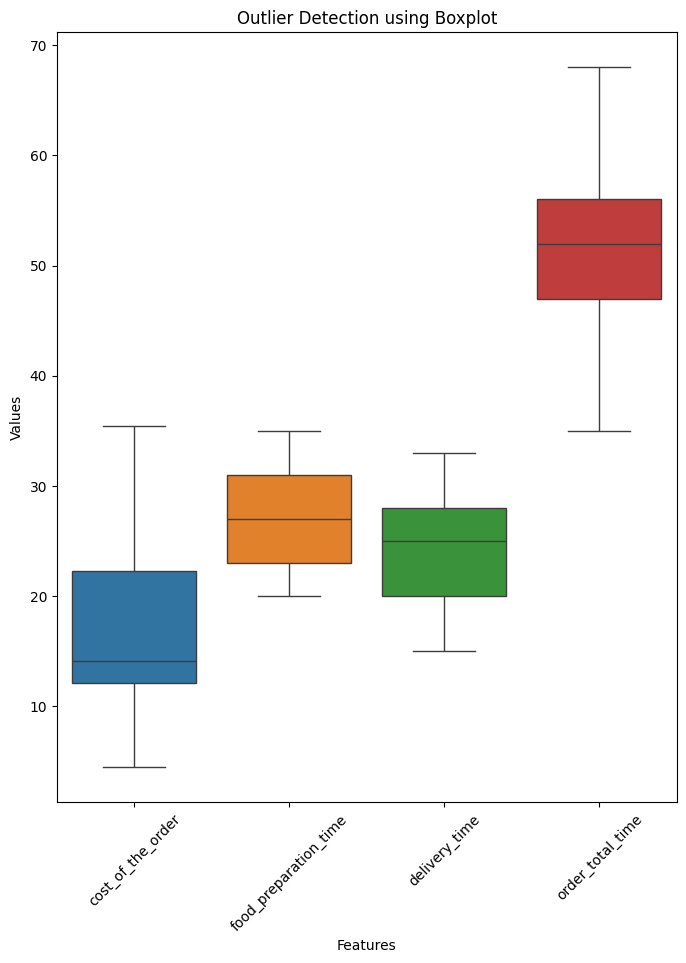

In [107]:
df_numeric = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'order_total_time']]
Q1 = df_numeric.quantile(0.25) # Calculate the first quartile for each numeric column
Q3 = df_numeric.quantile(0.75) # Calculate the third quartile for each numeric column
IQR = Q3 - Q1
outliers_iqr = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))

outliers = outliers_iqr.any(axis=1)
print(f"Number of outliers detected using IQR method: {outliers.sum()}")

plt.figure(figsize=(8, 10))
sns.boxplot(data=df_numeric, orient='v')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Outlier Detection using Boxplot')
plt.savefig('../reports/figures/outlier_detection_boxplot.png', dpi=150, bbox_inches='tight')
plt.show()

##### Check for customer features outliers: in numerical columns (number_of_orders, avg_spend, avg_order_total_time)

Number of outliers detected using IQR method: 67


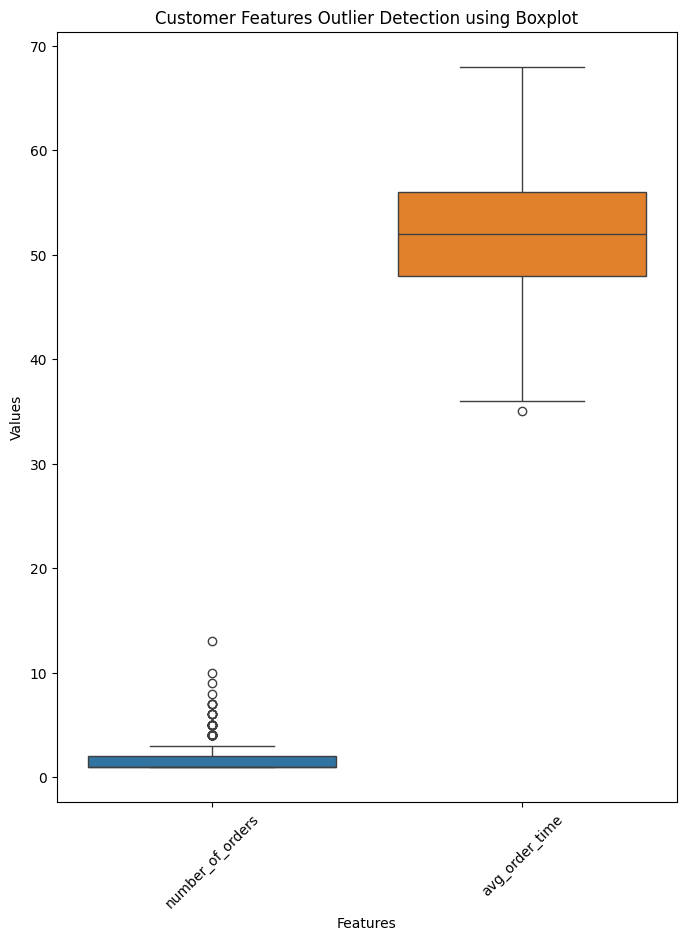

In [110]:
customer_features_numeric = customer_features[['number_of_orders', 'avg_order_time']]
customer_Q1 = customer_features_numeric.quantile(0.25) # Calculate the first quartile for each numeric column
customer_Q3 = customer_features_numeric.quantile(0.75) # Calculate the third quartile for each numeric column
customer_IQR = customer_Q3 - customer_Q1
customer_outliers_iqr = (customer_features_numeric < (customer_Q1 - 1.5 * customer_IQR)) | (customer_features_numeric > (customer_Q3 + 1.5 * customer_IQR))

customer_outliers = customer_outliers_iqr.any(axis=1)
print(f"Number of outliers detected using IQR method: {customer_outliers.sum()}")

plt.figure(figsize=(8, 10))
sns.boxplot(data=customer_features_numeric, orient='v')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Customer Features Outlier Detection using Boxplot')
plt.savefig('../reports/figures/customer_outlier_detection_boxplot.png', dpi=150, bbox_inches='tight')
plt.show()

##### Check for restaurant features outliers: in numerical columns (number_of_orders, food_prep_time_avg, order_time_avg, money_spent)

Number of outliers detected using IQR method: 23


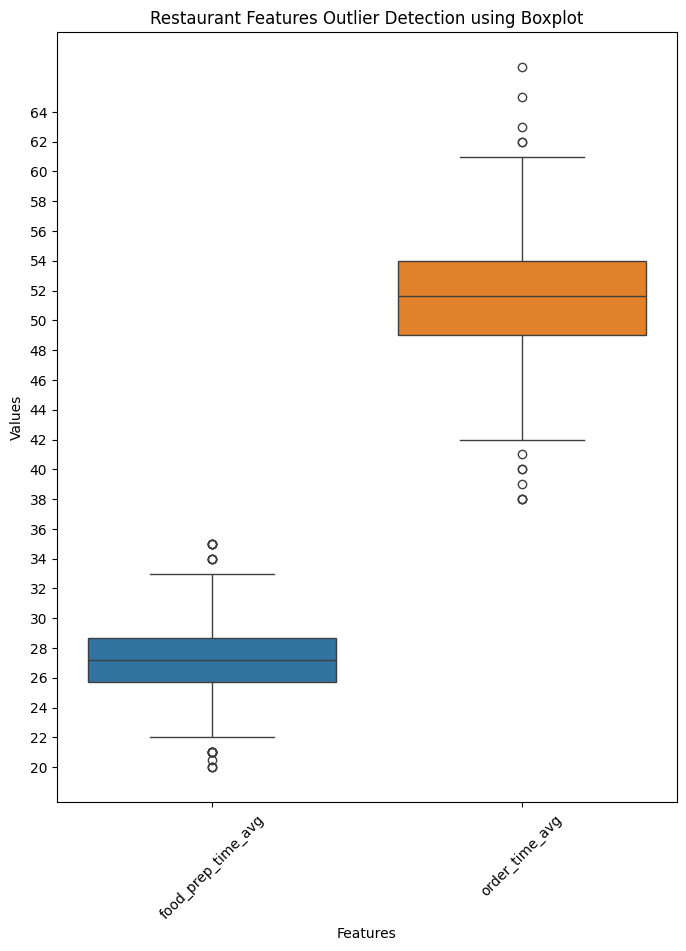

In [111]:
restaurant_features_numeric = restaurant_features[['food_prep_time_avg', 'order_time_avg']]
restaurant_Q1 = restaurant_features_numeric.quantile(0.25) # Calculate the first quartile for each numeric column
restaurant_Q3 = restaurant_features_numeric.quantile(0.75) # Calculate the third quartile for each numeric column
restaurant_IQR = restaurant_Q3 - restaurant_Q1
restaurant_outliers_iqr = (restaurant_features_numeric < (restaurant_Q1 - 1.5 * restaurant_IQR)) | (restaurant_features_numeric > (restaurant_Q3 + 1.5 * restaurant_IQR))

restaurant_outliers = restaurant_outliers_iqr.any(axis=1)
print(f"Number of outliers detected using IQR method: {restaurant_outliers.sum()}")

plt.figure(figsize=(8, 10))
sns.boxplot(data=restaurant_features_numeric, orient='v')
plt.xticks(rotation=45)
plt.yticks(np.arange(20, 65, 2))  # Example: set y-axis ticks from 40 to 64 with step 2
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Restaurant Features Outlier Detection using Boxplot')
plt.savefig('../reports/figures/restaurant_outlier_detection_boxplot.png', dpi=150, bbox_inches='tight')
plt.show()